In [11]:
%matplotlib notebook
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.misc import imread

In [5]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [6]:
def rotate(theta, index):
    x_ = sim.particles[index].x * np.cos(theta) - sim.particles[index].y* np.sin(theta)
    y_ = sim.particles[index].x * np.sin(theta) + sim.particles[index].y* np.cos(theta)
    return x_ , y_
    
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


sim.t = 0
sim.move_to_com()
Noutputs = 30000
years = 500.
#position in co-rotating frame
sun_pos = np.zeros((Noutputs,2))
earth_pos = np.zeros((Noutputs,2))
cruithne_pos = np.zeros((Noutputs,2))
times = np.zeros(Noutputs)
i = 0


x_earth = sim.particles[3].x
y_earth = sim.particles[3].y
z_earth = sim.particles[3].z
pos = (sim.particles[3].x, sim.particles[3].y)
theta = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    new_x_earth = sim.particles[3].x
    new_y_earth = sim.particles[3].y
    new_z_earth = sim.particles[3].z
    new_pos = (sim.particles[3].x, sim.particles[3].y)
    
    #theta = 2*np.arcsin( (np.sqrt((new_x_earth-x_earth)**2 + (new_y_earth-y_earth)**2)/2 ) \
                        #/np.sqrt(new_x_earth**2 + new_y_earth**2))    
        
    theta -= angle_between(pos,new_pos)    
    print(theta)
    angle = theta % (2*np.pi)
    earth_pos[i] = rotate(angle, 3)
    sun_pos[i] =  rotate(angle, 0)
    cruithne_pos[i] = rotate(angle, 5)
    
    x_earth = new_x_earth
    y_earth = new_y_earth
    z_earth = new_z_earth
    pos = new_pos
    #energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
#print(sun_pos)
#print(earth_pos)
#print(cruithne_pos)


0.0
-0.10619535995567471
-0.2121287655208659
-0.31778777215019033
-0.4231632444315005
-0.5282494008396648
-0.6330438150142047
-0.7375473766729277
-0.8417642150419625
-0.9457015884055934
-1.0493697437785352
-1.1527817507385878
-1.2559533133291965
-1.3589025637028724
-1.4616498408444005
-1.564217457320051
-1.6666294566061266
-1.7689113631606659
-1.871089926949765
-1.9731928637011316
-2.075248591851103
-2.1772859669678817
-2.279334014333226
-2.381421660281308
-2.483577462733401
-2.5858293414102396
-2.6882043090244596
-2.7907282053589215
-2.8934254356181386
-2.996318714329685
-3.099428816652592
-3.2027743394753387
-3.306371475105127
-3.410233800679279
-3.514372086670401
-3.6187941280729907
-3.723504602033877
-3.828504955773783
-3.9337933286101205
-4.039364511711665
-4.145209948884747
-4.251317781219533
-4.357672937803024
-4.464257273490756
-4.571049753040533
-4.678026681724642
-4.785161981349177
-4.892427507274485
-4.999793401716058
-5.1072284779133765
-5.214700628647994
-5.322177251743065

-74.65327067770639
-74.76126158329681
-74.86911769520265
-74.97680274596036
-75.08428280927403
-75.19152672256783
-75.29850645561051
-75.40519742038192
-75.51157871925038
-75.61763333038253
-75.72334823105625
-75.828714461134
-75.93372713025113
-76.03838537309528
-76.14269225737908
-76.24665464958451
-76.3502830449494
-76.45359136808715
-76.55659674935045
-76.65931928162192
-76.76178176197423
-76.86400942209708
-76.96602965072607
-77.06787171065463
-77.16956645228753
-77.27114602513011
-77.37264358815786
-77.47409301964969
-77.57552862676933
-77.67698485506759
-77.77849599820173
-77.88009590834676
-77.98181770744412
-78.08369349751959
-78.18575406460258
-78.28802856990846
-78.39054423129923
-78.49332601086371
-78.59639632219375
-78.69977475827118
-78.80347783613107
-78.90751875799428
-79.01190719263408
-79.11664908266192
-79.22174648393799
-79.32719744331847
-79.43299592074582
-79.53913176129223
-79.64559072214226
-79.75235455861655
-79.85940117218598
-79.96670482204455
-80.07423640024

-151.43491192307823
-151.53969391767515
-151.64415251953514
-151.7482929281049
-151.8521237832707
-151.95565699198775
-152.0589075277405
-152.16189320843168
-152.26463445727197
-152.36715405020541
-152.46947685308055
-152.57162955142113
-152.67364037510958
-152.77553881972315
-152.87735536574306
-152.97912119646168
-153.0808679151749
-153.18262726207172
-153.28443083110025
-153.38630978708392
-153.48829458348578
-153.59041468142232
-153.69269827079384
-153.79517199471888
-153.89786067877773
-154.00078706670115
-154.10397156432248
-154.2074319949525
-154.3111833702756
-154.4152376799241
-154.51960370304613
-154.62428684610737
-154.72928901152414
-154.83460850170354
-154.9402399629042
-155.04617437303057
-155.15239907698404
-155.25889787249272
-155.36565114842722
-155.47263607649742
-155.57982685595462
-155.68719500956166
-155.79470972773615
-155.90233825600083
-156.0100463184764
-156.1177985707797
-156.22555907514428
-156.33329178753942
-156.44096104681822
-156.5485320562945
-156.655971

-227.3531821542134
-227.45603239524596
-227.55864133197213
-227.6610326171092
-227.7632319675674
-227.86526689449042
-227.9671664288987
-228.06896084449727
-228.17068137851754
-228.27235995137076
-228.3740288858506
-228.4757206265938
-228.5774674604215
-228.6793012374879
-228.7812530907405
-228.88335314748167
-228.9856302277247
-229.0881115350483
-229.1908223557603
-229.29378577671937
-229.39702242065115
-229.50055019505106
-229.6043840546062
-229.7085357804643
-229.81301378077268
-229.91782291793893
-230.02296436935103
-230.1284355267415
-230.23422993848837
-230.34033729954726
-230.44674349326237
-230.55343068832363
-230.66037749297666
-230.7675591672651
-230.8749478925926
-230.98251309627702
-231.09022182710032
-231.19803917621704
-231.30592873626304
-231.41385309022138
-231.52177432067327
-231.62965452905925
-231.73745635318286
-231.84514347301925
-231.95268109607193
-232.06003641211092
-232.1671790087646
-232.27408124132327
-232.3807185516126
-232.48706973237753
-232.59311713523238

-303.5751216021017
-303.6767170052186
-303.77825611253576
-303.8797725332663
-303.98130003968083
-304.08287227665505
-304.1845224714577
-304.28628314371
-304.38818581569166
-304.4902607234996
-304.59253652989344
-304.6950400400358
-304.797795921809
-304.9008264329176
-305.0041511575496
-305.10778675593343
-305.2117467306706
-305.3160412141984
-305.4206767820048
-305.5256562959203
-305.6309787821972
-305.7366393509173
-305.8426291618454
-305.94893544043373
-306.0555415479617
-306.1624271090262
-306.2695681982417
-306.37693758651164
-306.48450504560947
-306.5922377080788
-306.70010047770546
-306.8080564841037
-306.9160675733961
-307.0240948256425
-307.1320990887107
-307.2400415177761
-307.3478841091528
-307.45559021631027
-307.5631250380676
-307.6704560710125
-307.7775535174309
-307.8843906417817
-307.99094407102086
-308.0971940358603
-308.20312455174644
-308.30872353996256
-308.4139828907174
-308.5188984713339
-308.6234700836718
-308.72770137573013
-308.8315997130271
-308.9351760158077


-378.35648911980724
-378.45919113430585
-378.56170609301904
-378.66405852935526
-378.7662745290015
-378.8683814679561
-378.9704077475025
-379.0723825277604
-379.1743354611285
-379.2762964264478
-379.37829526391397
-379.4803615082198
-379.58252411325884
-379.6848111638442
-379.78724958234477
-379.88986484578936
-379.992680720503
-380.09571901074935
-380.1989993170487
-380.3025388039702
-380.40635198025063
-380.510450495291
-380.61484295640366
-380.71953477124936
-380.8245280199038
-380.92982136093246
-381.0354099757151
-381.14128555492863
-381.2474363300297
-381.3538471517514
-381.4604996188312
-381.56737225796326
-381.67444075344645
-381.7816782247524
-381.88905554909223
-381.9965417245886
-382.104104268345
-382.2117096425627
-382.3193237009175
-382.4269121467214
-382.53444099399536
-382.64187702248955
-382.7491882179306
-382.8563441893622
-382.9633165563799
-383.0700792998483
-383.17660906990665
-383.2828854474649
-383.3888911580704
-383.4946122365805
-383.60003814206493
-383.70516182

-455.28570962793617
-455.3881509587722
-455.4908510170653
-455.5938330341332
-455.697117552434
-455.80072215817154
-455.9046612289683
-456.00894570127895
-456.11358286270274
-456.2185761747498
-456.3239251318703
-456.42962516262077
-456.53566757867304
-456.64203957695713
-456.74872429956406
-456.85570095507234
-456.9629450031094
-457.0704284019862
-457.1781199197673
-457.28598550622945
-457.3939887196619
-457.5020912016158
-457.6102531911737
-457.7184340687002
-457.8265929178607
-457.9346890939746
-458.0426827865347
-458.15053556396964
-458.25821088944485
-458.3656745976379
-458.4728953239258
-458.5798448792356
-458.68649856581425
-458.7928354309159
-458.8988384564735
-459.00449468517326
-459.109795286445
-459.21473556603354
-459.31931492313356
-459.4235367603511
-459.5274083525511
-459.6309406809786
-459.73414823880097
-459.8370488125183
-459.9396632395658
-460.0420151385112
-460.1441306129596
-460.2460379436981
-460.34776728665844
-460.4493503808403
-460.5508202599434
-460.6522109623

-531.9383112408295
-532.0442629782173
-532.1504956728627
-532.2569932240004
-532.3637362213707
-532.470702135013
-532.5778655566254
-532.6851984902747
-532.7926706882325
-532.9002500286931
-533.0079029299728
-533.1155947929606
-533.2232904636102
-533.330954706777
-533.4385526821495
-533.54605041287
-533.653415237659
-533.7606162378374
-533.8676246315406
-533.9744141285526
-534.0809612404989
-534.1872455425436
-534.2932498842238
-534.3989605485218
-534.5043673594139
-534.6094637386991
-534.7142467139676
-534.8187168817716
-534.9228783303975
-535.0267385259227
-535.1303081655673
-535.2336010026735
-535.3366336475754
-535.4394253483509
-535.5419977551004
-535.6443746709834
-535.7465817928259
-535.8486464437201
-535.9505972997007
-536.0524641121863
-536.1542774275047
-536.2560683045524
-536.357868031475
-536.4597078421484
-536.5616186331588
-536.6636306818258
-536.7657733656131
-536.8680748837046
-536.9705619824305
-537.07325968599
-537.1761910334066
-537.2793768231418
-537.3828353675309
-

-608.9503137609489
-609.0577176265354
-609.1649053718095
-609.2718487865933
-609.378522772854
-609.4849056166496
-609.5909792028747
-609.6967291723511
-609.8021450222864
-609.9072201524585
-610.0119518606645
-610.1163412919118
-610.2203933464666
-610.3241165519926
-610.4275229045455
-610.5306276821195
-610.6334492307459
-610.7360087194199
-610.83832986687
-610.9404386567157
-611.0423630571196
-611.1441327465925
-611.2457788394463
-611.3473336065342
-611.448830190735
-611.5503023182541
-611.6517840069241
-611.7533092723278
-611.8549118322738
-611.9566248100616
-612.0584804370328
-612.1605097550746
-612.2627423199802
-612.3652059068208
-612.4679262185812
-612.5709265996047
-612.6742277567462
-612.7778474920384
-612.8818004501159
-612.9860978840376
-613.0907474442854
-613.1957529964402
-613.3011144733939
-613.4068277680747
-613.5128846725819
-613.6192728692803
-613.7259759787546
-613.8329736685483
-613.9402418253162
-614.047752791419
-614.1554756651778
-614.2633766621134
-614.371419532340

-684.3445149883084
-684.4521461812069
-684.5596155365978
-684.666891218914
-684.7739439237996
-684.8807472321349
-684.9872779119722
-685.0935161650825
-685.1994458164336
-685.3050544464661
-685.4103334674305
-685.5152781462579
-685.6198875774612
-685.7241646103527
-685.8281157353434
-685.9317509342832
-686.0350834997193
-686.1381298275211
-686.2409091872235
-686.3434434749519
-686.4457569532321
-686.5478759806723
-686.649828733927
-686.7516449241158
-686.8533555094959
-686.9549924057682
-687.0565881950183
-687.1581758340371
-687.2597883626337
-687.3614586124727
-687.4632189168734
-687.5651008220151
-687.6671348000955
-687.7693499651547
-687.8717737924931
-687.9744318428912
-688.0773474931652
-688.1805416748165
-688.2840326226061
-688.3878356359577
-688.4919628577519
-688.5964230744518
-688.7012215412818
-688.8063598372906
-688.91183575564
-689.0176432344173
-689.1237723329904
-689.2302092584471
-689.3369364459182
-689.4439326955886
-689.5511733679538
-689.6586306374229
-689.76627380275

-761.5318048694722
-761.6344604225098
-761.7369291700251
-761.8392354304556
-761.9414051198229
-762.043465501691
-762.145444928953
-762.2473725795174
-762.3492781872807
-762.451191769503
-762.5531433516354
-762.6551626905481
-762.7572789970702
-762.8595206588546
-762.961914964802
-763.0644878324757
-763.1672635401325
-763.2702644652363
-763.3735108316154
-763.477020467713
-763.5808085786946
-763.6848875354982
-763.7892666842657
-763.8939521798268
-763.9989468467021
-764.1042500714033
-764.2098577314728
-764.3157621656245
-764.421952187776
-764.5284131480512
-764.635127043359
-764.7420726790333
-764.8492258817487
-764.9565597625835
-765.064045027681
-765.1716503325284
-765.2793426745004
-765.3870878170503
-765.4948507378833
-765.602596092665
-765.7102886854218
-765.8178939364628
-765.9253783376968
-766.032709886784
-766.1398584938585
-766.2467963533355
-766.3534982745327
-766.4599419667941
-766.5661082761848
-766.6719813721372
-766.7775488837091
-766.8828019862876
-766.9877354406018
-76

-837.0375098814334
-837.1397474746724
-837.2417909797651
-837.3436688501663
-837.4454110856207
-837.5470489508914
-837.6486146911775
-837.750141244686
-837.8516619531505
-837.9532102713254
-838.0548194757642
-838.1565223728105
-838.2583510060147
-838.3603363635369
-838.4625080863689
-838.5648941785645
-838.6675207210748
-838.7704115911382
-838.8735881895432
-838.977069178506
-839.0808702333616
-839.185003811735
-839.2894789443284
-839.3943010519291
-839.4994717936552
-839.6049889517263
-839.7108463576683
-839.8170338644529
-839.9235373705344
-840.0303389004
-840.1374167435663
-840.2447456535896
-840.3522971074564
-840.4600396238847
-840.5679391371748
-840.675959421424
-840.784062558175
-840.8922094390631
-841.0003602937936
-841.1084752330094
-841.2165147952736
-841.3244404875807
-841.4322153089731
-841.5398042455432
-841.6471747206474
-841.7542969832826
-841.8611444288564
-841.9676938624784
-842.0739257178302
-842.1798242315296
-842.285377564727
-842.3905778672829
-842.4954212858603
-8

-913.0460521095874
-913.1480400481663
-913.2500376228738
-913.3520740080852
-913.4541780965051
-913.5563782262481
-913.6587019083269
-913.7611755563524
-913.8638242197093
-913.9666713215778
-914.0697384037464
-914.1730448805935
-914.2766078049792
-914.3804416490549
-914.4845581031663
-914.5889658961812
-914.693670640728
-914.7986747069467
-914.9039771284237
-915.0095735439497
-915.1154561786077
-915.2216138674155
-915.3280321243011
-915.4346932580263
-915.5415765352363
-915.6486583917257
-915.7559126914496
-915.8633110295848
-915.9708230755996
-916.0784169513936
-916.1860596383045
-916.2937174057582
-916.4013562536057
-916.5089423597259
-916.6164425243152
-916.723824602421
-916.8310579167115
-916.9381136431773
-917.0449651634364
-917.1515883785289
-917.2579619801943
-917.3640676759746
-917.4698903662041
-917.5754182738963
-917.680643028384
-917.785559703718
-917.8901668141527
-917.9944662698402
-918.098463296264
-918.2021663211546
-918.3055868327283
-918.4087392130198
-918.511640549918

-988.8480480737912
-988.9498668438931
-989.0518648473115
-989.1540719656577
-989.2565162892699
-989.359223814318
-989.4622181448776
-989.5655202032256
-989.669147951533
-989.7731161289779
-989.8774360091993
-989.982115183511
-990.0871573755712
-990.192562293284
-990.2983255237015
-990.404438476516
-990.5108883813551
-990.6176583434188
-990.7247274610658
-990.8320710076813
-990.9396606786667
-991.0474649026617
-991.1554492137802
-991.2635766788445
-991.3718083737674
-991.4801039013522
-991.5884219392248
-991.6967208065178
-991.8049590378066
-991.9130959527104
-992.0210922099884
-992.1289103351278
-992.2365152089219
-992.3438745010477
-992.4509590332253
-992.5577430701736
-992.6642045533135
-992.7703252894671
-992.8760910919985
-992.9814918669871
-993.0865216416547
-993.1911785377065
-993.2954646962403
-993.3993861609977
-993.5029527255036
-993.6061777495861
-993.7090779506699
-993.8116731747554
-993.9139861514269
-994.0160422365961
-994.1178691460537
-994.2194966822716
-994.320956456309

-1064.8648116228078
-1064.9677873405733
-1065.071058971702
-1065.1746443331176
-1065.2785581235933
-1065.3828116952186
-1065.4874128494025
-1065.592365662363
-1065.6976703453727
-1065.8033231449965
-1065.9093162884135
-1066.0156379785928
-1066.1222724435781
-1066.2292000433276
-1066.3363974364852
-1066.443837808089
-1066.5514911576504
-1066.6593246453044
-1066.7673029920077
-1066.8753889275465
-1066.9835436775177
-1067.0917274810242
-1067.1999001297936
-1067.308021516465
-1067.4160521803074
-1067.523953839124
-1067.631689896586
-1067.7392259151386
-1067.8465300459438
-1067.9535734088795
-1068.0603304173749
-1068.1667790446581
-1068.2729010297962
-1068.378682023597
-1068.4841116760253
-1068.589183668119
-1068.6938956923354
-1068.7982493855616
-1068.9022502192347
-1069.0059073523546
-1069.1092334536602
-1069.212244497959
-1069.3149595410225
-1069.4174004773267
-1069.5195917845024
-1069.621560257718
-1069.723334736603
-1069.8249458267157
-1069.9264256170734
-1070.0278073948302
-1070.12912

-1141.954305599605
-1142.0624524648547
-1142.1707033663856
-1142.2790176177687
-1142.387353615723
-1142.4956694133894
-1142.6039233016133
-1142.7120743854662
-1142.8200831445513
-1142.927911963276
-1143.0355256111343
-1143.1428916568648
-1143.2499808176672
-1143.3567672582517
-1143.4632288460907
-1143.5693473551962
-1143.6751086098216
-1143.780502566124
-1143.8855233348734
-1143.9901691504397
-1144.0944422919372
-1144.1983489626161
-1144.3018991334995
-1144.4051063570002
-1144.5079875556576
-1144.6105627903491
-1144.712855012149
-1144.8148898023546
-1144.9166951041389
-1145.0183009479044
-1145.119739171914
-1145.2210431394626
-1145.3222474534077
-1145.4233876684307
-1145.5245000010211
-1145.625621036911
-1145.7267874355687
-1145.8280356313414
-1145.9294015308358
-1146.0309202062206
-1146.1326255843805
-1146.2345501322436
-1146.3367245390702
-1146.439177397115
-1146.5419348827133
-1146.6450204404525
-1146.7484544735553
-1146.8522540450465
-1146.9564325960337
-1147.060999687239
-1147.165

-1218.8628832015338
-1218.969677299077
-1219.076099588062
-1219.1821331263209
-1219.2877656047672
-1219.3929893676004
-1219.4978013704115
-1219.6022030828226
-1219.7062003427995
-1219.809803169987
-1219.9130255453179
-1220.015885163748
-1220.1184031663151
-1220.2206038569577
-1220.3225144084947
-1220.424164561221
-1220.5255863174011
-1220.6268136346314
-1220.7278821196014
-1220.8288287227308
-1220.9296914337867
-1221.0305089783053
-1221.1313205142876
-1221.2321653283682
-1221.3330825304984
-1221.4341107462321
-1221.5352878058063
-1221.6366504293715
-1221.738233908008
-1221.840071780634
-1221.9421955074736
-1222.0446341414722
-1222.1474139998425
-1222.2505583388634
-1222.3540870359352
-1222.4580162835139
-1222.5623583006854
-1222.6671210705947
-1222.7723081122524
-1222.877918294776
-1222.98394570316
-1223.0903795641816
-1223.1972042371992
-1223.3043992681269
-1223.4119395034545
-1223.5197952733859
-1223.6279326647773
-1223.7363138940586
-1223.844897770782
-1223.953640235502
-1224.062494

-1293.506428184072
-1293.6144783274635
-1293.7223984834236
-1293.8301520162506
-1293.9377044355451
-1294.04502381066
-1294.1520811522512
-1294.2588507469866
-1294.365310434832
-1294.4714418237168
-1294.5772304411848
-1294.6826658254474
-1294.7877415594323
-1294.8924552521714
-1294.996808472413
-1295.1008066397271
-1295.2044588785304
-1295.3077778404363
-1295.4107795001303
-1295.513482929686
-1295.6159100557973
-1295.7180854038286
-1295.8200358319511
-1295.9217902580688
-1296.023379381563
-1296.1248354011075
-1296.2261917293847
-1296.32748270583
-1296.4287433082602
-1296.530008863266
-1296.631314754865
-1296.7326961310598
-1296.8341876080674
-1296.935822972084
-1297.037634878678
-1297.139654550277
-1297.2419114726088
-1297.3444330914165
-1297.4472445113215
-1297.550368199386
-1297.6538236966512
-1297.7576273417083
-1297.861792011119
-1297.9663268822712
-1298.071237224817
-1298.1765242268534
-1298.2821848618453
-1298.3882118038255
-1298.494593397871
-1298.6013136904437
-1298.708352523875

-1367.0801057898395
-1367.18521028517
-1367.2907172636915
-1367.3966218015717
-1367.5029143287647
-1367.6095806116407
-1367.7166018026714
-1367.823954561965
-1367.931611253317
-1368.0395402153795
-1368.1477061086957
-1368.2560703356846
-1368.3645915268933
-1368.4732260854469
-1368.5819287795246
-1368.6906533705976
-1368.7993532636367
-1368.9079821645519
-1369.0164947298474
-1369.124847193834
-1369.2329979597482
-1369.3409081426812
-1369.448542054249
-1369.5558676213072
-1369.6628567336236
-1369.7694855176444
-1369.8757345350045
-1369.9815889075066
-1370.0870383734941
-1370.1920772805215
-1370.2967045198525
-1370.4009234095079
-1370.5047415330646
-1370.608170541367
-1370.7112259240346
-1370.813926757147
-1370.9162954328406
-1371.0183573757888
-1371.1201407507747
-1371.2216761647776
-1371.3229963662345
-1371.4241359432995
-1371.5251310222325
-1371.6260189664624
-1371.7268380763699
-1371.8276272892697
-1371.9284258785694
-1372.0292731511324
-1372.1302081424747
-1372.2312693092033
-1372.33

-1439.4072644099545
-1439.5118790220574
-1439.6161390052137
-1439.7200508501855
-1439.8236247018285
-1439.9268741722892
-1440.0298161285652
-1440.1324704590006
-1440.2348598230828
-1440.337009388391
-1440.4389465579573
-1440.5407006906753
-1440.6423028168163
-1440.7437853501713
-1440.8451817979437
-1440.9465264690975
-1441.0478541815023
-1441.1491999679197
-1441.2505987807542
-1441.3520851954522
-1441.4536931125078
-1441.5554554581638
-1441.6574038839851
-1441.7595684655848
-1441.8619774017247
-1441.9646567163068
-1442.067629965678
-1442.1709179536056
-1442.2745384572856
-1442.37850596874
-1442.4828314566273
-1442.5875221539288
-1442.6925813772812
-1442.7980083838593
-1442.9037982716857
-1443.0099419289609
-1443.1164260375137
-1443.223233134731
-1443.3303417373786
-1443.43772652958
-1443.5453586158806
-1443.6532058381413
-1443.761233152905
-1443.8694030666024
-1443.9776761231453
-1444.0860114349023
-1444.194367245348
-1444.3027015054106
-1444.4109724409627
-1444.5191390976943
-1444.627

-1512.0240429358043
-1512.1305606022718
-1512.2373753939887
-1512.3444655319213
-1512.4518056894035
-1512.559367255756
-1512.6671186588924
-1512.775025743376
-1512.8830521985233
-1512.9911600293901
-1513.0993100618891
-1513.2074624721076
-1513.315577328999
-1513.4236151382113
-1513.5315373753735
-1513.6393069997425
-1513.7468889378115
-1513.8542505273497
-1513.961361914647
-1514.0681963995264
-1514.1747307245332
-1514.2809453066554
-1514.3868244116852
-1514.4923562721713
-1514.597533148605
-1514.7023513302715
-1514.8068110730558
-1514.910916483344
-1515.0146753692131
-1515.118099074302
-1515.221202295244
-1515.3240028786402
-1515.4265215969524
-1515.528781906841
-1515.6308096946511
-1515.7326330124208
-1515.834281806701
-1515.935787642022
-1516.0371834203545
-1516.1385030974236
-1516.2397813962882
-1516.341053518282
-1516.4423548512175
-1516.5437206747165
-1516.6451858624955
-1516.746784581476
-1516.848549987759
-1516.9505139198222
-1517.0527065897043
-1517.1551562734792
-1517.25788900

-1583.7140723664922
-1583.819363387336
-1583.9242805772726
-1584.028823551317
-1584.1329960292703
-1584.236805694307
-1584.340264015575
-1584.4433860410447
-1584.5461901667472
-1584.6486978882851
-1584.7509335395146
-1584.8529240206697
-1584.9546985134086
-1585.0562881775006
-1585.1577258313368
-1585.2590456311889
-1585.3602827628042
-1585.4614731447996
-1585.5626531356957
-1585.6638592389836
-1585.765127804642
-1585.8664947272848
-1585.967995141406
-1586.0696631142175
-1586.1715313367554
-1586.2736308142057
-1586.3759905567622
-1586.4786372728381
-1586.5815950670326
-1586.6848851458835
-1586.7885255350702
-1586.8925308123573
-1586.9969118611818
-1587.1016756503282
-1587.2068250452037
-1587.3123586562585
-1587.418270731886
-1587.5245511030057
-1587.6311851844102
-1587.7381540379504
-1587.8454345021314
-1587.9529993911904
-1588.0608177648576
-1588.1688552679634
-1588.2770745367811
-1588.3854356666882
-1588.4938967334426
-1588.602414358297
-1588.7109443053994
-1588.8194420986433
-1588.92

-1659.003158325911
-1659.1086499835835
-1659.2138245381666
-1659.3186778175952
-1659.4232092741847
-1659.5274219210994
-1659.63132223099
-1659.7349200011738
-1659.8382281897116
-1659.9412627265997
-1660.044042304001
-1660.146588149135
-1660.2489237831185
-1660.3510747686698
-1660.453068449096
-1660.5549336805313
-1660.6567005590075
-1660.758400143555
-1660.8600641760797
-1660.9617247983083
-1661.0634142661704
-1661.165164662605
-1661.2670076095922
-1661.3689739796196
-1661.4710936069428
-1661.5733949995192
-1661.675905052917
-1661.778648767965
-1661.8816489744174
-1661.9849260633314
-1662.0884977312908
-1662.192378740026
-1662.2965806953546
-1662.4011118496994
-1662.5059769326385
-1662.611177014116
-1662.71670940498
-1662.8225675994865
-1662.928741263813
-1663.0352162736006
-1663.1419748044793
-1663.24899547899
-1663.3562535699823
-1663.463721259894
-1663.5713679543155
-1663.6791606465072
-1663.7870643277897
-1663.8950424371553
-1664.0030573420265
-1664.1110708409622
-1664.219044678275

-1734.6176459220947
-1734.7223158624604
-1734.8266229935782
-1734.9305731226973
-1735.0341758033712
-1735.1374441550736
-1735.2403946575466
-1735.3430469255004
-1735.4454234682482
-1735.5475494358932
-1735.6494523487745
-1735.7511618056005
-1735.8527091755761
-1735.9541272912575
-1736.0554501533586
-1736.1567126443451
-1736.257950242956
-1736.359198735319
-1736.460493921796
-1736.5618713198664
-1736.6633658633223
-1736.7650115977856
-1736.8668413731807
-1736.9688865346097
-1737.0711766128852
-1737.1737390158967
-1737.276598722837
-1737.3797779842062
-1737.4832960313126
-1737.587168799672
-1737.6914086712852
-1737.7960242412596
-1737.9010201146586
-1738.0063967397268
-1738.112150283757
-1738.2182725577625
-1738.324750995814
-1738.431568694342
-1738.5387045158982
-1738.6461332603928
-1738.7538259044475
-1738.8617499092586
-1738.9698695960253
-1739.0781465834095
-1739.1865402799342
-1739.2950084227305
-1739.4035076521152
-1739.5119941099515
-1739.620424048772
-1739.7287544381973
-1739.836

-1810.7419255505051
-1810.844843378068
-1810.9475090290582
-1811.0499449560164
-1811.1521758246479
-1811.254228252655
-1811.3561305412547
-1811.45791240123
-1811.5596046749677
-1811.6612390556284
-1811.762847804245
-1811.864463465248
-1811.9661185807824
-1812.0678454041197
-1812.169675612515
-1812.2716400199977
-1812.3737682906856
-1812.4760886532526
-1812.5786276175536
-1812.6814096957703
-1812.7844571309404
-1812.8877896351594
-1812.991424140176
-1813.0953745640156
-1813.1996515978058
-1813.3042625172466
-1813.4092110232928
-1813.5144971166587
-1813.6201170107122
-1813.7260630871592
-1813.8323238985936
-1813.9388842215
-1814.0457251625996
-1814.1528243205446
-1814.2601560039016
-1814.3676915048063
-1814.475399425166
-1814.5832460521983
-1814.6911957794448
-1814.7992115654008
-1814.9072554211127
-1815.0152889175831
-1815.1232737029757
-1815.2311720191997
-1815.338947207509
-1815.4465641932964
-1815.5539899412317
-1815.6611938732158
-1815.768148242779
-1815.8748284596
-1815.98121335557

-1880.7723256396423
-1880.8742628099997
-1880.976254181481
-1881.0783291681537
-1881.1805165051337
-1881.2828439714092
-1881.385338114492
-1881.4880239784527
-1881.5909248371852
-1881.6940619350637
-1881.797454237481
-1881.901118194061
-1882.0050675176606
-1882.1093129825476
-1882.2138622451585
-1882.3187196906783
-1882.4238863099279
-1882.5293596118047
-1882.6351335747706
-1882.7411986405846
-1882.8475417538102
-1882.954146449978
-1883.060992994285
-1883.1680585715462
-1883.2753175268444
-1883.3827416549348
-1883.4903005350384
-1883.5979619062457
-1883.7056920774526
-1883.8134563646122
-1883.9212195472378
-1884.0289463355766
-1884.1366018389697
-1884.2441520252053
-1884.351564163376
-1884.4588072427882
-1884.5658523596733
-1884.6726730653797
-1884.7792456712707
-1884.8855495068105
-1884.9915671286603
-1885.0972844799035
-1885.2026909997546
-1885.3077796851771
-1885.4125471067696
-1885.5169933820146
-1885.6211221096262
-1885.7249402691855
-1885.8284580905993
-1885.9316888980113
-1886.0

-1955.5635800413465
-1955.6655943470084
-1955.7674522176503
-1955.8691837912352
-1955.9708203943933
-1956.0723942606105
-1956.173938247673
-1956.275485555718
-1956.377069445737
-1956.47872295575
-1956.580478608129
-1956.6823681025603
-1956.7844220002703
-1956.8866694149106
-1956.9891377193442
-1957.0918522659056
-1957.1948361151717
-1957.2981097721931
-1957.4016909325596
-1957.5055942422075
-1957.6098310753823
-1957.7144093354543
-1957.8193332835299
-1957.9246033998697
-1958.0302162826224
-1958.1361645891725
-1958.242437026471
-1958.3490183942904
-1958.4558896842696
-1958.5630282373945
-1958.6704079612468
-1958.777999606638
-1958.885771101467
-1958.9936879378406
-1959.1017136066994
-1959.2098100725184
-1959.3179382792002
-1959.4260586771275
-1959.534131760551
-1959.6421186042116
-1959.7499813882598
-1959.8576839005048
-1959.9651920051285
-1960.0724740704163
-1960.1795013493722
-1960.286248307005
-1960.3926928904018
-1960.4988167398178
-1960.6046053406214
-1960.7100481174057
-1960.81513

-2030.9588143117178
-2031.0610173398138
-2031.1631023489526
-2031.2650972879742
-2031.367031032078
-2031.468933116502
-2031.5708334664753
-2031.6727621239256
-2031.774748971293
-2031.8768234534505
-2031.979014299238
-2032.0813492436757
-2032.1838547517332
-2032.286555745097
-2032.38947533387
-2032.4926345555764
-2032.5960521242878
-2032.6997441930184
-2032.8037241327822
-2032.9080023319495
-2033.0125860197031
-2033.1174791175567
-2033.22268212294
-2033.3281920288382
-2033.4340022833596
-2033.540102792873
-2033.6464799718128
-2033.7531168408586
-2033.859993174843
-2033.967085702455
-2034.074368356553
-2034.1818125720727
-2034.28938762808
-2034.3970610291606
-2034.504798919926
-2034.6125665252857
-2034.7203286082347
-2034.8280499363404
-2034.9356957478112
-2035.0432322080962
-2035.1506268483458
-2035.2578489777611
-2035.3648700628837
-2035.4716640681222
-2035.578207752635
-2035.6844809192398
-2035.790466614127
-2035.8961512778355
-2036.0015248473674
-2036.1065808106175
-2036.211316215649

-2102.974154642672
-2103.081622042882
-2103.189300074774
-2103.2971554126234
-2103.405152291009
-2103.5132529668663
-2103.621418220799
-2103.729607889187
-2103.837781415131
-2103.9458984062026
-2104.053919187356
-2104.161805337564
-2104.269520199342
-2104.3770293514235
-2104.4843010362824
-2104.5913065358563
-2104.6980204906477
-2104.8044211592237
-2104.9104906169414
-2105.0162148944337
-2105.1215840579434
-2105.2265922347915
-2105.331237587715
-2105.4355222420954
-2105.5394521717617
-2105.643037049679
-2105.746290068566
-2105.8492277360333
-2105.9518696488517
-2106.0542382505832
-2106.156358576243
-2106.2582579870664
-2106.3599658978596
-2106.4615134988644
-2106.5629334736054
-2106.6642597138775
-2106.765527032824
-2106.866770876877
-2106.968027037042
-2107.0693313588768
-2107.1707194473906
-2107.272226359351
-2107.3738862781993
-2107.475732179061
-2107.5777954988607
-2107.6801058187125
-2107.7826905553657
-2107.885574657214
-2107.988780304729
-2108.0923266188197
-2108.196229382236
-2

-2176.1916936874873
-2176.2933346931063
-2176.395035430802
-2176.496828041987
-2176.5987438809902
-2176.70081322756
-2176.803065001738
-2176.9055264823132
-2177.0082230304974
-2177.1111778210334
-2177.2144115832302
-2177.317942353946
-2177.421785243213
-2177.525952210575
-2177.63045184927
-2177.7352891856494
-2177.840465513703
-2177.945978280632
-2178.051821026064
-2178.1579833721844
-2178.264451064655
-2178.371206066909
-2178.4782267107717
-2178.585487905211
-2178.692961403316
-2178.800616125741
-2178.90841853702
-2179.016333069491
-2179.1243225876974
-2179.2323488836787
-2179.340373193703
-2179.448356727513
-2179.556261198264
-2179.66404934174
-2179.771685414459
-2179.87913566106
-2179.9863687424395
-2180.0933561175316
-2180.2000723732053
-2180.3064954984798
-2180.412607100939
-2180.51839256487
-2180.6238411521435
-2180.728946048204
-2180.8337043566357
-2180.938117046559
-2181.0421888573355
-2181.1459281649936
-2181.2493468153466
-2181.352459929704
-2181.4552856881637
-2181.557845094

-2251.485293894741
-2251.586914552389
-2251.6886015986684
-2251.7903874480035
-2251.8923037277827
-2251.994380982428
-2252.0966483781544
-2252.199133409707
-2252.3018616106933
-2252.4048562695302
-2252.508138153463
-2252.6117252435934
-2252.7156324844163
-2252.8198715519043
-2252.9244506446375
-2253.029374302488
-2253.13464325799
-2253.2402543272215
-2253.34620034593
-2253.4524701552186
-2253.559048641344
-2253.665916833541
-2253.773052062491
-2253.880428180486
-2253.9880158426736
-2254.0957828469186
-2254.203694527975
-2254.311714199814
-2254.4198036382895
-2254.527923594867
-2254.636034331071
-2254.7440961626858
-2254.8520700022996
-2254.9599178878516
-2255.067603486629
-2255.1750925666042
-2255.2823534260074
-2255.389357273725
-2255.4960785554827
-2255.602495222507
-2255.7085889410864
-2255.814345243042
-2255.9197536185943
-2256.024807554347
-2256.1295045201086
-2256.2338459089815
-2256.3378369356515
-2256.441486498089
-2256.544807007914
-2256.6478141944253
-2256.7505268868827
-2256

-2327.497830875243
-2327.599762914157
-2327.701922657614
-2327.8043385343726
-2327.907036695462
-2328.010040728567
-2328.1133713785775
-2328.2170462702165
-2328.3210796313
-2328.4254820277683
-2328.530260130912
-2328.635416529994
-2328.7409495914476
-2328.8468533635305
-2328.9531175306875
-2329.0597274236916
-2329.166664090368
-2329.2739044314867
-2329.3814214050753
-2329.4891843003
-2329.5971590798194
-2329.705308787232
-2329.8135940139614
-2329.9219734177013
-2330.0304042825705
-2330.1388431094692
-2330.247246223922
-2330.3555703880234
-2330.463773403098
-2330.571814689962
-2330.679655833601
-2330.7872610814566
-2330.8945977879807
-2331.001636798144
-2331.108352764559
-2331.2147243957065
-2331.320734634896
-2331.426370771498
-2331.531624487614
-2331.6364918446957
-2331.7409732156243
-2331.845073168365
-2331.9488003076403
-2332.0521670811045
-2332.15518955634
-2332.2578871745545
-2332.3602824862464
-2332.462400873421
-2332.5642702621203
-2332.6659208280444
-2332.7673846975604
-2332.86

-2403.934949931008
-2404.040183290886
-2404.14573722821
-2404.251604772497
-2404.3577752386536
-2404.464234273472
-2404.5709639535435
-2404.677942937814
-2404.7851466762754
-2404.89254767304
-2405.0001158014343
-2405.107818667518
-2405.215622016734
-2405.323490176871
-2405.431386529263
-2405.539273999126
-2405.6471155552645
-2405.754874709047
-2405.862516002616
-2405.97000547672
-2406.077311109381
-2406.1844032178137
-2406.2912548171807
-2406.3978419302857
-2406.504143844435
-2406.6101433150006
-2406.715826715201
-2406.8211841323146
-2406.9262094122882
-2407.030900155822
-2407.135257669699
-2407.2392868776255
-2407.342996195111
-2407.4463973730203
-2407.549505314331
-2407.652337868428
-2407.7549156069936
-2407.857261585216
-2407.959401091598
-2408.0613613892456
-2408.163171451234
-2408.2648616923634
-2408.366463698749
-2408.4680099544307
-2408.5695335603796
-2408.671067939197
-2408.772646525155
-2408.8743024516916
-2408.976068249138
-2409.0779755530443
-2409.180054816218
-2409.28233501

-2480.723837118039
-2480.8322699606247
-2480.9406774255003
-2481.0490164299326
-2481.1572447721533
-2481.265321709119
-2481.373208502393
-2481.4808689213196
-2481.588269694391
-2481.6953809016986
-2481.8021763035294
-2481.908633602444
-2482.014734638138
-2482.120465515505
-2482.2258166681413
-2482.3307828625575
-2482.4353631486542
-2482.5395607616315
-2482.6433829812563
-2482.7468409547564
-2482.8499494894613
-2482.952726820921
-2483.0551943617
-2483.1573764354293
-2483.259299999999
-2483.360994363097
-2483.462490892655
-2483.5638227241166
-2483.6650244657826
-2483.766131902905
-2483.867181700783
-2483.9682111067614
-2484.069257650713
-2484.1703588432165
-2484.2715518705086
-2484.3728732859445
-2484.4743586982595
-2484.5760424565124
-2484.677957331601
-2484.780134194973
-2484.8826016959656
-2484.98538593998
-2485.088510170572
-2485.1919944593437
-2485.2958554083643
-2485.400105870657
-2485.504754695053
-2485.6098065023084
-2485.71526149979
-2485.8211153421735
-2485.927359045486
-2486.0

-2557.9358978809296
-2558.0401344489915
-2558.144030629653
-2558.247596581292
-2558.350845852553
-2558.4537951753696
-2558.5564642375098
-2558.6588754390636
-2558.761053636846
-2558.8630258802937
-2558.964821141963
-2559.066470044826
-2559.16800458599
-2559.269457851928
-2559.370863718541
-2559.4722565381885
-2559.5736708278646
-2559.6751409695526
-2559.7767009204385
-2559.8783839252233
-2559.980222225769
-2560.0822467673347
-2560.1844869032643
-2560.286970100517
-2560.3897216478363
-2560.4927643687656
-2560.596118342578
-2560.699800636947
-2560.8038250568
-2560.908201914287
-2561.012937825215
-2561.118035537614
-2561.2234937981943
-2561.329307262392
-2561.4354664533407
-2561.541957774574
-2561.6487635804797
-2561.755862307599
-2561.8632286685115
-2561.970833907721
-2562.0786461182456
-2562.1866306175298
-2562.2947503770006
-2562.402966497919
-2562.511238725278
-2562.61952598998
-2562.7277869683126
-2562.8359806470266
-2562.9440668820394
-2563.052006939027
-2563.1597640048676
-2563.267

-2634.6644670133187
-2634.7656816099384
-2634.8669261782634
-2634.96823647048
-2635.069647827183
-2635.1711948751063
-2635.2729112214947
-2635.3748291454103
-2635.476979286692
-2635.5793903337863
-2635.6820887120675
-2635.7850982746986
-2635.888439999528
-2635.992131697037
-2636.0961877340496
-2636.2006187781667
-2636.305431569047
-2636.4106287234076
-2636.516208580862
-2636.6221650976113
-2636.7284877946217
-2636.8351617662242
-2636.942167754025
-2637.0494822896785
-2637.157077908417
-2637.264923433388
-2637.372984328852
-2637.4812231182673
-2637.5895998611145
-2637.698072679276
-2637.806598322777
-2637.9151327650525
-2638.0236318143275
-2638.132051727114
-2638.2403498105264
-2638.3484850005916
-2638.4564184046344
-2638.564113797295
-2638.6715380615387
-2638.7786615681384
-2638.8854584892933
-2638.991907044322
-2639.097989677525
-2639.2036931704
-2639.309008692235
-2639.413931794369
-2639.518462353074
-2639.622604463095
-2639.7263662807345
-2639.829759818026
-2639.93280070096
-2640.03

-2708.6337633718636
-2708.7383697523724
-2708.842593430338
-2708.9464416697588
-2709.049925616053
-2709.153060084431
-2709.255863323471
-2709.3583567591936
-2709.460564724431
-2709.5625141786372
-2709.6642344228912
-2709.76575681269
-2709.867114467616
-2709.968341972392
-2710.0694750635835
-2710.1705503067506
-2710.2716047790327
-2710.3726757655104
-2710.473800464535
-2710.575015693959
-2710.6763575939317
-2710.777861325344
-2710.879560764316
-2710.981488193585
-2711.083673991912
-2711.186146323068
-2711.288930826537
-2711.3920503126697
-2711.495524465389
-2711.5993695566194
-2711.703598178715
-2711.808219001096
-2711.913236556809
-2712.018651065785
-2712.124458302128
-2712.230649512573
-2712.337211392724
-2712.444126126859
-2712.551371495971
-2712.6589210572693
-2712.7667443966457
-2712.874807453678
-2712.9830729165583
-2713.0915006821533
-2713.200048374207
-2713.3086719105277
-2713.41732610702
-2713.5259653055887
-2713.634544013844
-2713.743017541801
-2713.8513426206455
-2713.9594779

-2784.547379916218
-2784.6502186754888
-2784.7527975123353
-2784.8551393175976
-2784.95726923501
-2785.059214403085
-2785.1610036897637
-2785.2626674213693
-2785.364237107745
-2785.4657451648745
-2785.5672246352897
-2785.6687089062666
-2785.7702314259045
-2785.871825417151
-2785.9735235898547
-2786.0753578510144
-2786.1773590136568
-2786.2795565050637
-2786.381978075371
-2786.4846495079887
-2786.5875943338365
-2786.6908335519706
-2786.7943853598185
-2786.8982648969045
-2787.002484006639
-2787.1070510212785
-2787.211970575264
-2787.3172434522403
-2787.4228664727307
-2787.528832428789
-2787.635130069797
-2787.7417441434845
-2787.848655495757
-2787.9558412315805
-2788.063274937666
-2788.1709269660314
-2788.278764775804
-2788.3867533288517
-2788.494855533163
-2788.6030327263206
-2788.7112451900657
-2788.819452685879
-2788.927615000871
-2789.035692492875
-2789.143646622656
-2789.251440462177
-2789.359039170795
-2789.466410430535
-2789.5735248326587
-2789.6803562102523
-2789.786881913506
-27

-2843.3473119248474
-2843.451191796928
-2843.5553836317113
-2843.6598955542768
-2843.764732243125
-2843.869894792795
-2843.975380613345
-2844.0811833715798
-2844.1872929785573
-2844.2936956273256
-2844.4003738840283
-2844.5073068344736
-2844.6144702870265
-2844.7218370312894
-2844.829377150618
-2844.9370583845357
-2845.04484653467
-2845.1527059083733
-2845.2605997930386
-2845.368490950883
-2845.476342124102
-2845.584116540323
-2845.691778408194
-2845.7992933932837
-2845.9066290652095
-2846.013755307944
-2846.1206446865644
-2846.22727276518
-2846.333618372318
-2846.4396638116696
-2846.545395017624
-2846.650801656542
-2846.7558771757977
-2846.8606188031276
-2846.9650274993774
-2847.0691078695313
-2847.172868037503
-2847.27631948912
-2847.3794768875177
-2847.482357865329
-2847.584982797787
-2847.687374560451
-2847.7895582747647
-2847.8915610441404
-2847.993411682787
-2848.095140439039
-2848.1967787146045
-2848.298358780787
-2848.3999134923765
-2848.501475999692
-2848.6030794591547
-2848.7

-2915.7615747693785
-2915.8671527271845
-2915.972443100853
-2916.077440888315
-2916.1821444763996
-2916.2865555939725
-2916.3906792273083
-2916.4945235014907
-2916.5980995316327
-2916.701421247451
-2916.8045051950066
-2916.907370320075
-2917.0100377369736
-2917.112530485626
-2917.21487327937
-2917.3170922458976
-2917.419214663442
-2917.5212686939485
-2917.6232831146426
-2917.725287049106
-2917.827309698825
-2917.929380075929
-2918.031526737653
-2918.1337775229645
-2918.236159291849
-2918.338697667897
-2918.4414167851014
-2918.5443390401347
-2918.6474848517887
-2918.7508724294594
-2918.8545175526974
-2918.9584333651146
-2919.0626301870907
-2919.167115350539
-2919.271893058928
-2919.3769642765496
-2919.4823266511703
-2919.587974473907
-2919.693898679795
-2919.800086891993
-2919.9065235119087
-2920.013189856712
-2920.120064344752
-2920.22712272835
-2920.334338372432
-2920.4416825764697
-2920.549124936379
-2920.6566337411537
-2920.764176394829
-2920.87171985027
-2920.9792310376515
-2921.08

-2987.042817392611
-2987.1452916507833
-2987.2478963078165
-2987.3506550299226
-2987.453589996905
-2987.55672166098
-2987.660068514123
-2987.763646866469
-2987.867470638608
-2987.9715511708814
-2988.0758970530374
-2988.1805139777807
-2988.2854046218686
-2988.39056855844
-2988.4960022039277
-2988.601698801996
-2988.707648447625
-2988.8138381547897
-2988.920251968222
-2989.0268711190515
-2989.1336742239537
-2989.2406375264195
-2989.347735177604
-2989.4549395531362
-2989.5622216011907
-2989.6695512161764
-2989.7768976315724
-2989.8842298248546
-2989.9915169270666
-2990.09872862949
-2990.205835580089
-2990.3128097628723
-2990.4196248532116
-2990.5262565425683
-2990.632682829323
-2990.7388842728838
-2990.844844208101
-2990.9505489188296
-2991.055987770041
-2991.1611532961274
-2991.2660412394666
-2991.3706505341793
-2991.4749832420725
-2991.579044459768
-2991.682842210097
-2991.7863873167903
-2991.8896932574066
-2991.9927759933644
-2992.095653779368
-2992.198346955651
-2992.3008777262226
-29

-3061.0115625811004
-3061.1147467148257
-3061.2176691129766
-3061.3203504664702
-3061.4228138094204
-3061.52508426197
-3061.6271887525154
-3061.7291557226476
-3061.8310148308205
-3061.932796668115
-3062.0345324850273
-3062.1362539215916
-3062.237992735833
-3062.3397805292107
-3062.441648469841
-3062.5436270149835
-3062.645745633659
-3062.7480325298684
-3062.8505143673933
-3062.95321599765
-3063.056160192615
-3063.1593673853145
-3063.2628554208472
-3063.3666393213125
-3063.470731068452
-3063.5751394082067
-3063.679869681716
-3063.784923687486
-3063.8902995795315
-3063.995991806205
-3064.1019910941977
-3064.2082844815286
-3064.314855401799
-3064.4216838219727
-3064.52874643623
-3064.6360169147633
-3064.743466204999
-3064.8510628819868
-3064.95877354313
-3065.0665632408536
-3065.174395945495
-3065.282235029629
-3065.3900437642915
-3065.4977858171
-3065.605425742267
-3065.71292945275
-3065.8202646655386
-3065.927401312107
-3066.034311907379
-3066.140971871343
-3066.2473597984376
-3066.3534

-3128.861904629285
-3128.968678033084
-3129.075231511403
-3129.1815451751363
-3129.287602156971
-3129.3933887668636
-3129.498894599551
-3129.6041125952347
-3129.709039055541
-3129.813673617482
-3129.918019188381
-3130.0220818450034
-3130.125870701375
-3130.2293977501927
-3130.3326776816366
-3130.4357276829446
-3130.538567222076
-3130.641217818526
-3130.7437028039412
-3130.846047074713
-3130.948276838347
-3131.050419355096
-3131.152502676248
-3131.2545553803893
-3131.3566063090366
-3131.4586843030315
-3131.5608179407764
-3131.6630352775405
-3131.765363581435
-3131.867829059988
-3131.970456578816
-3132.073269385902
-3132.1762888548524
-3132.2795342496734
-3132.383022507096
-3132.4867680335647
-3132.5907825179465
-3132.6950747635105
-3132.7996505434458
-3132.9045124840673
-3133.0096599796752
-3133.11508914273
-3133.2207927926943
-3133.326760486401
-3133.4329785922173
-3133.5394304094907
-3133.6460963338827
-3133.752954068199
-3133.8599788773117
-3133.9671438842643
-3134.074420402589
-3134

<IPython.core.display.Javascript object>


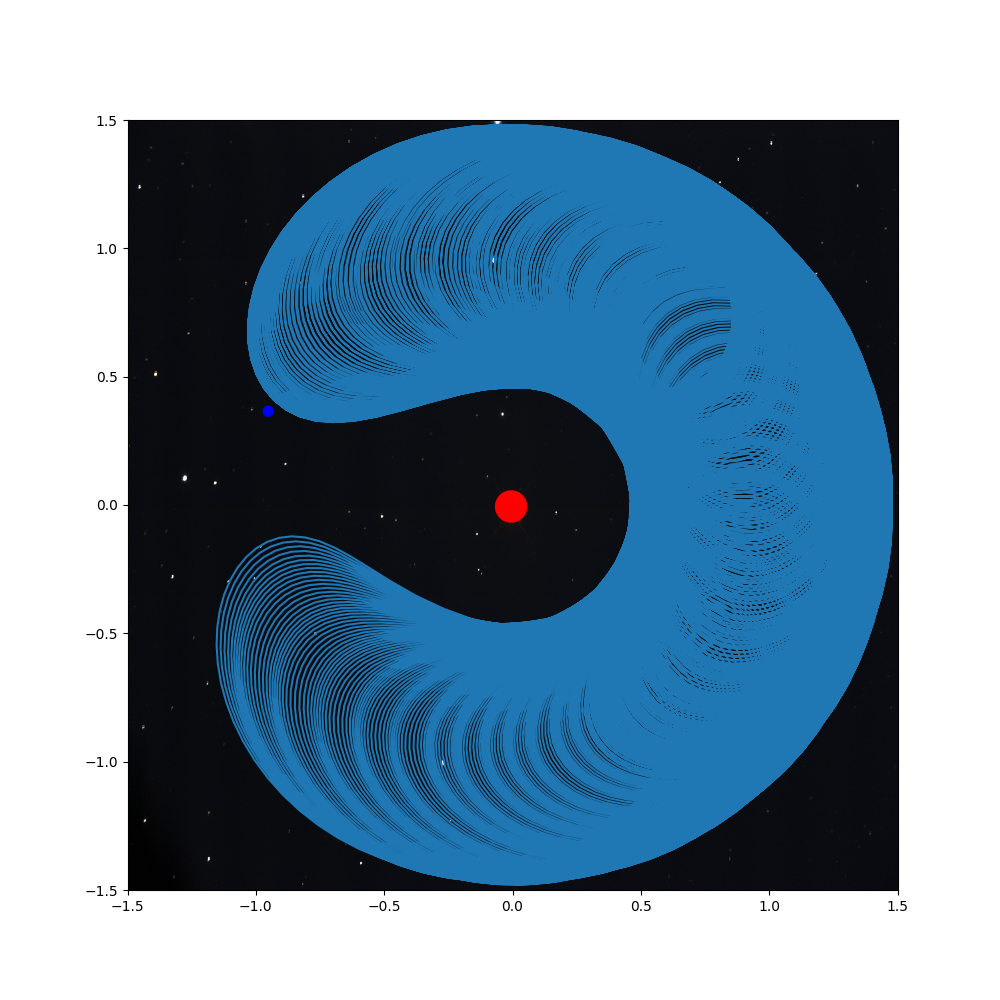

/afs/inf.ed.ac.uk/user/s14/s1439626/SHP/Cruithne3753/env/lib/python3.4/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


x_pos = [earth_pos[0,0],sun_pos[0,0],cruithne_pos[0,0]]
y_pos = [earth_pos[0,1],sun_pos[0,1],cruithne_pos[0,1]]
line_x = []
line_y = []
scat = ax.scatter(x_pos,  \
                  y_pos,   \
                  c=['b','r','g'], marker="o", s=[50,500,20])
line, = ax.plot(line_x,line_y)
img = imread("stars.jpg")
plt.imshow(img, zorder=0, extent=[-1.5, 1.5, -1.5, 1.5])

def update(frame):
    
    x_pos = [earth_pos[frame,0],sun_pos[frame,0],cruithne_pos[frame,0]]
    y_pos = [earth_pos[frame,1],sun_pos[frame,1],cruithne_pos[frame,1]]
    scat.set_offsets(np.c_[x_pos,y_pos])
    
    line_x.append(cruithne_pos[frame,0])
    line_y.append(cruithne_pos[frame,1])
    line.set_data(line_x,line_y)
    return scat, line,


ani = animation.FuncAnimation(fig, update, blit=True,interval=1)
plt.show()

<IPython.core.display.Javascript object>


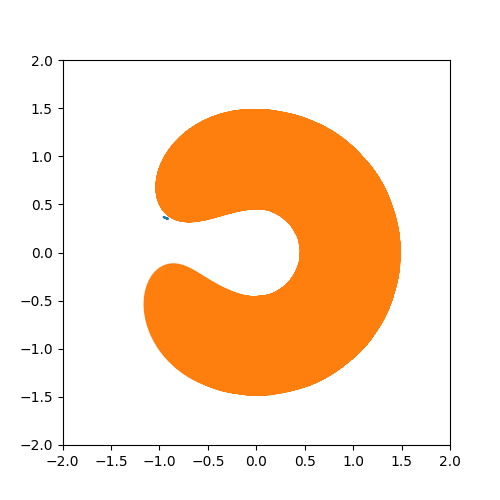

In [8]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(cruithne_pos[:,0],cruithne_pos[:,1]);